# Global Ocean Wind L4 Near real Time 6 hourly Observations
## (Mediterranean Sea)
### Information on the product
For the Global Ocean - The IFREMER CERSAT Global Blended Mean Wind Fields include wind components (meridional and zonal), wind module, wind stress, and wind/stress curl and divergence. The associated error estimates are also provided. The estimation of the 6-hourly blended wind products make use of remotely sensed surface wind derived from scatterometers on board ASCAT-A and ASCAT-B (coastal winds) provided by KNMI, remotely wind speeds from the SSMIS radiometer onboard the F16, F17, F18, and F19 satellites provided by Remote Sensing Systems (RSS), and wind speed and direction from the WindSat radiometer onboard the Coriolis satellite, all used as observation inputs for the objective method dealing with the calculation of 6-hourly wind fields over global oceans with 0.25°×0.25° spatial resolution. L4 winds are calculated from L2b products in combination with ECMWF operational wind analyses from January 2016. The analysis is performed for each synoptic time (00h:00; 06h:00; 12h:00; 18h:00 UTC) and with a spatial resolution of 0.25° in longitude and latitude over the global ocean, with a short delay from the real time (24 - 48 hours) in a nominal mode. The blended products will be updated and made available when new remotely sensed data (such as AMSR) is available for Ifremer in near real time.

link to documentation: https://resources.marine.copernicus.eu/documents/PUM/CMEMS-WIND-PUM-012-004.pdf

Coordinate System : WGS 84 (EPSG 4326)  
Temporal Coverage: from 2018-07-07T00:00:00Z to Present  
Uldate Frequency: 	daily (Daily at 12:00 UTC at day + 2)

In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature


# for autocompletion disable the autocompletion tool 'jedi'
%config Completer.use_jedi = False

# formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
wind = xr.open_dataset(
    "/home/imke/Desktop/MariData/Data/CMEMS/CERSAT-GLO-BLENDED_WIND_L4-V6-OBS_FULL_TIME_SERIE_1611912698879.nc"
)

<IPython.core.display.Javascript object>

In [3]:
wind

<xarray.Dataset>
Dimensions:                            (lat: 641, lon: 1440, time: 7)
Coordinates:
  * lon                                (lon) float32 -180.0 -179.8 ... 179.8
  * time                               (time) datetime64[ns] 2021-01-25T18:00...
  * lat                                (lat) float32 -80.0 -79.75 ... 79.75 80.0
Data variables:
    surface_downward_eastward_stress   (time, lat, lon) float64 ...
    wind_stress_divergence             (time, lat, lon) float64 ...
    northward_wind                     (time, lat, lon) float64 ...
    wind_speed_rms                     (time, lat, lon) float64 ...
    northward_wind_rms                 (time, lat, lon) float64 ...
    wind_vector_curl                   (time, lat, lon) float64 ...
    eastward_wind                      (time, lat, lon) float64 ...
    wind_speed                         (time, lat, lon) float64 ...
    wind_stress                        (time, lat, lon) float64 ...
    wind_vector_divergence             (time, lat, lon) float64 ...
    wind_stress_curl                   (time, lat, lon) float64 ...
    eastward_wind_rms                  (time, lat, lon) float64 ...
    surface_type                       (time, lat, lon) float32 ...
    surface_downward_northward_stress  (time, lat, lon) float64 ...
Attributes:
    Conventions:                                    CF-1.7, ACDD-1.3, ISO 8601
    FROM_ORIGINAL_FILE__netcdf_version_id:          4.6.1 of Sep  8 2018 17:2...
    date_created:                                   2021-01-29T07:44:31
    date_modified:                                  2021-01-29T07:44:31
    id:                                             WIND_GLO_WIND_L4_NRT_OBSE...
    naming_authority:                               fr.ifremer.cersat
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    standard_name_vocabulary:                       NetCDF Climate and Foreca...
    institution:                                    Institut Francais de Rech...
    institution_abbreviation:                       Ifremer/Cersat
    title:                                          Global Ocean - Wind Analy...
    summary:                                        Multi-sensor blended wind...
    cdm_data_type:                                  grid
    keywords:                                       Oceans > Ocean Winds > Su...
    keywords_vocabulary:                            NASA Global Change Master...
    project:                                        Copernicus - Marine envir...
    acknowledgment:                                 Please acknowledge the us...
    license:                                        These data are available ...
    format_version:                                 v1.0
    processing_software:                            Ifremer blended wind NRT ...
    FROM_ORIGINAL_FILE__product_version:             1.0
    uuid:                                           5c56f11e-d2ae-457b-be2a-5...
    processing_level:                               L4
    history:                                        analysis originally produ...
    publisher_name:                                 CMEMS
    publisher_url:                                  marine.copernicus.eu
    publisher_email:                                servicedesk.cmems@mercato...
    creator_name:                                   CERSAT
    creator_url:                                    http://cersat.ifremer.fr
    creator_email:                                  cersat@ifremer.fr
    references:                                     Product User Manual for W...
    metadata_link:                                  
    source:                                         Ifremer blended wind NRT ...
    source_version:                                 6.0
    FROM_ORIGINAL_FILE__platform:                   Metop-A Metop-B DMSP_F-16...
    FROM_ORIGINAL_FILE__platform_type:              low_earth_orbit_satellite...
    instrument:              

<IPython.core.display.Javascript object>

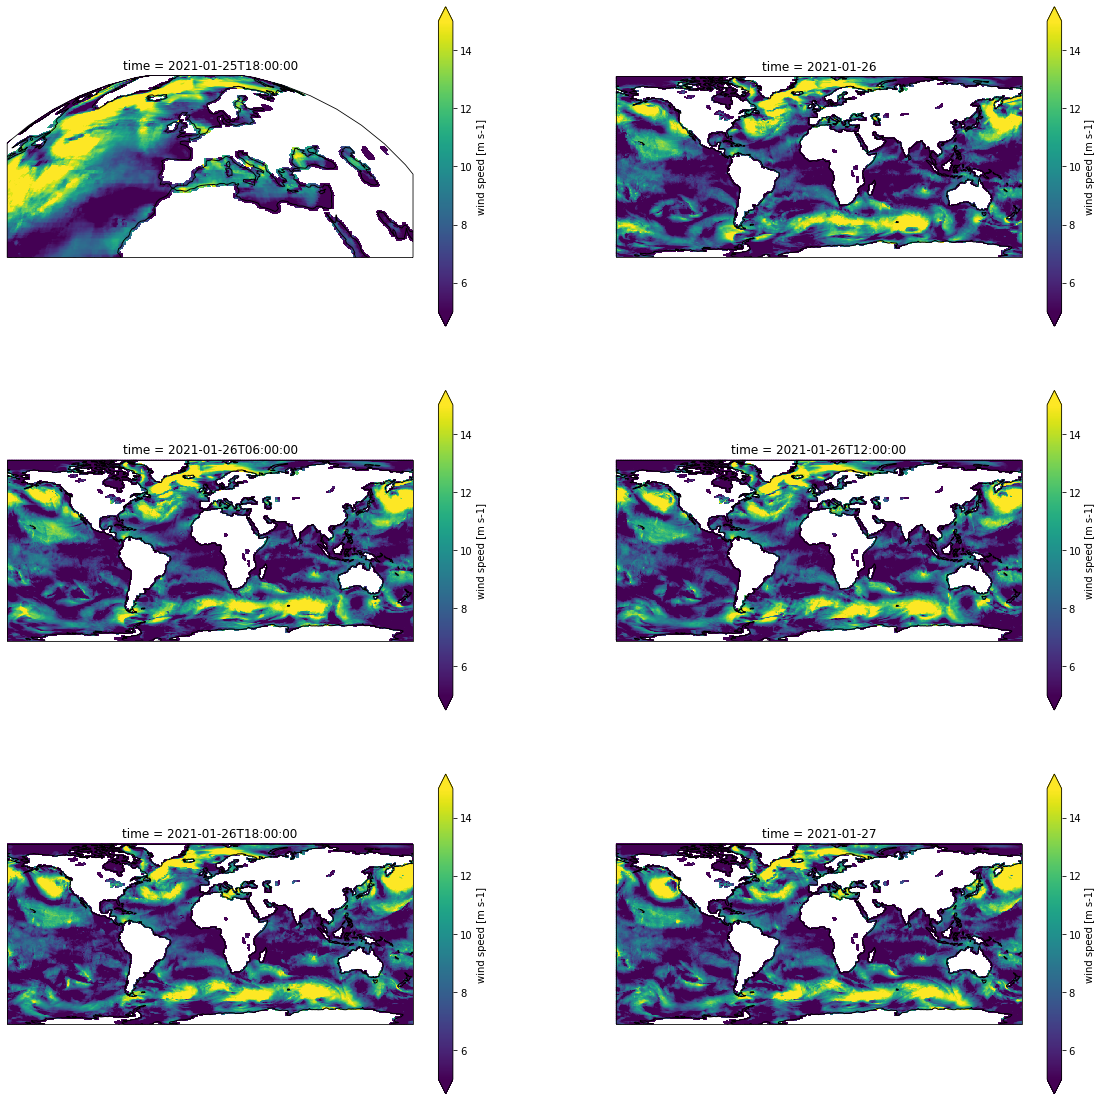

<IPython.core.display.Javascript object>

In [12]:
# subplot(nrows, ncols, index, **kwargs)

fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(3, 2, 1, projection=ccrs.Orthographic())
ax1.coastlines()
ax1.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind.wind_speed.isel(time=0).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="viridis", vmin=5, vmax=15
)

ax2 = plt.subplot(3, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines()
# ax2.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind.wind_speed.isel(time=1).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="viridis", vmin=5, vmax=15
)

ax3 = plt.subplot(3, 2, 3, projection=ccrs.PlateCarree())
ax3.coastlines()
# ax3.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind.wind_speed.isel(time=2).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="viridis", vmin=5, vmax=15
)

ax4 = plt.subplot(3, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines()
# ax4.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind.wind_speed.isel(time=3).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="viridis", vmin=5, vmax=15
)

ax5 = plt.subplot(3, 2, 5, projection=ccrs.PlateCarree())
ax5.coastlines()
# ax5.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind.wind_speed.isel(time=4).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="viridis", vmin=5, vmax=15
)

ax6 = plt.subplot(3, 2, 6, projection=ccrs.PlateCarree())
ax6.coastlines()
# ax6.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind.wind_speed.isel(time=5).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="viridis", vmin=5, vmax=15
)
plt.show()

### Wind stress curl

In [5]:
wind.wind_vector_curl

<xarray.DataArray 'wind_vector_curl' (time: 7, lat: 641, lon: 1440)>
[6461280 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time     (time) datetime64[ns] 2021-01-25T18:00:00 ... 2021-01-27T06:00:00
  * lat      (lat) float32 -80.0 -79.75 -79.5 -79.25 ... 79.25 79.5 79.75 80.0
Attributes:
    long_name:              wind vector curl
    standard_name:          atmosphere_relative_vorticity
    authority:              CF-1.7
    units:                  s-1
    coverage_content_type:  physicalMeasurement
    _ChunkSizes:            [  1 321 720]

<IPython.core.display.Javascript object>

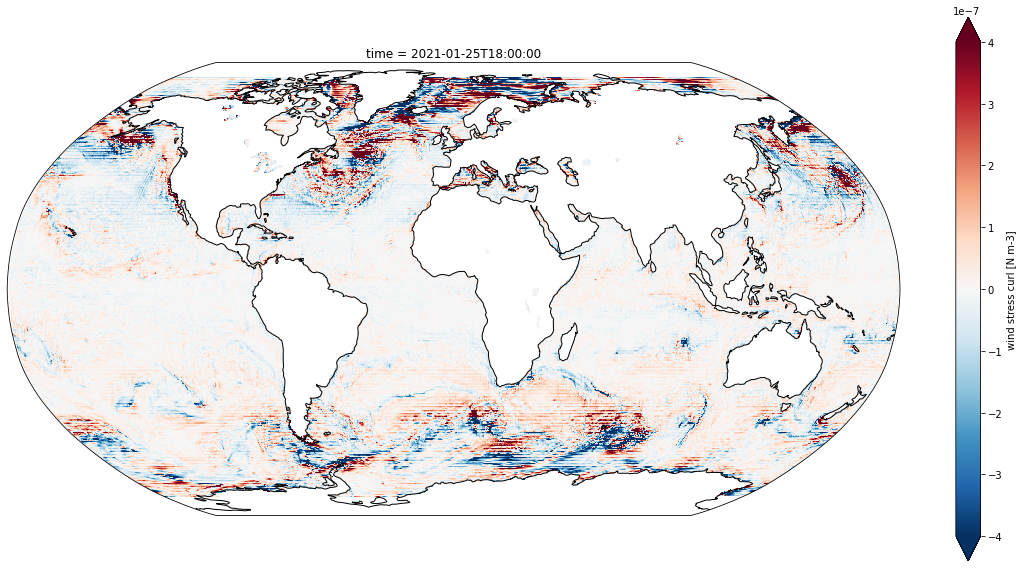

<IPython.core.display.Javascript object>

In [6]:
fig = plt.figure(figsize=(20, 10))
# fig.suptitle("{variable}".format(variable=v.name))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
p = wind.wind_stress_curl.isel(time=0).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="RdBu_r", vmin=-4e-7, vmax=4e-7
)

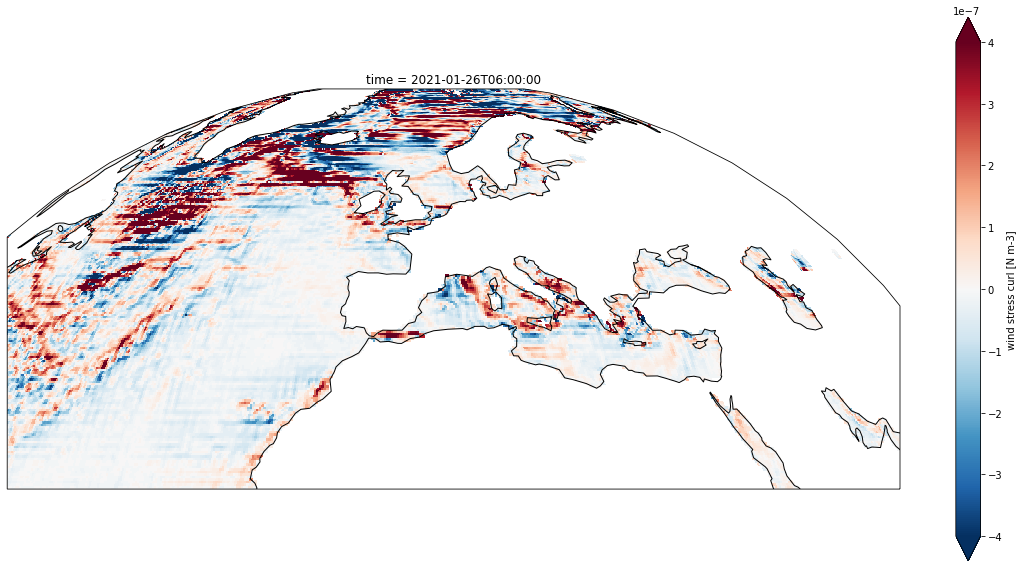

<IPython.core.display.Javascript object>

In [7]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines()
# ax.add_feature(cfeature.LAKES)
ax.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind.wind_stress_curl.isel(time=2).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="RdBu_r", vmin=-4e-7, vmax=4e-7
)

In [8]:
wind.wind_vector_curl

<xarray.DataArray 'wind_vector_curl' (time: 7, lat: 641, lon: 1440)>
[6461280 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time     (time) datetime64[ns] 2021-01-25T18:00:00 ... 2021-01-27T06:00:00
  * lat      (lat) float32 -80.0 -79.75 -79.5 -79.25 ... 79.25 79.5 79.75 80.0
Attributes:
    long_name:              wind vector curl
    standard_name:          atmosphere_relative_vorticity
    authority:              CF-1.7
    units:                  s-1
    coverage_content_type:  physicalMeasurement
    _ChunkSizes:            [  1 321 720]

<IPython.core.display.Javascript object>

In [9]:
wind.wind_speed.to_dataframe()

wind_speed
time                lat   lon                
2021-01-25 18:00:00 -80.0 -180.00    6.440430
                          -179.75    6.440430
                          -179.50    6.480469
                          -179.25    6.540039
                          -179.00    6.610352
...                                       ...
2021-01-27 06:00:00  80.0  178.75    1.709961
                           179.00    1.700195
                           179.25    1.690430
                           179.50    1.690430
                           179.75    1.690430

[6461280 rows x 1 columns]

<IPython.core.display.Javascript object>

In [10]:
wind2 = xr.open_dataset(
    "/home/imke/Desktop/MariData/Data/CMEMS/CERSAT-GLO-BLENDED_WIND_L4-V6-OBS_FULL_TIME_SERIE_1611912698879.nc"
)


<IPython.core.display.Javascript object>

In [11]:
wind2
wind.wind_stress_curl

<xarray.DataArray 'wind_stress_curl' (time: 7, lat: 641, lon: 1440)>
[6461280 values with dtype=float64]
Coordinates:
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time     (time) datetime64[ns] 2021-01-25T18:00:00 ... 2021-01-27T06:00:00
  * lat      (lat) float32 -80.0 -79.75 -79.5 -79.25 ... 79.25 79.5 79.75 80.0
Attributes:
    long_name:              wind stress curl
    standard_name:          vertical_component_of_surface_downward_stress_curl
    authority:              CF-1.7
    units:                  N m-3
    coverage_content_type:  physicalMeasurement
    _ChunkSizes:            [  1 321 720]

<IPython.core.display.Javascript object>